# Mínimos Cuadrados
## Ecuaciones normales

In [1]:
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
np.random.seed(123)

### Modelos
Definición de modelos 
* Lineal: $f(t)=c_1 + c_2\, t$
* Cuadrático: $f(t)=c_1 + c_2\, t + c_3\, t^2$
* Exponencial: $f(t)=c_1\,e^{c_2\,t}$
* Periódico: $f(t)=c_1 + c_2\,\cos(2\pi t) + c_3\,\sin(2\pi t) + c_4\, \cos(4\pi t)$*
* Ley de potencia: $f(t)=c_1t^{c_2}$

In [2]:
lm = lambda c_1, c_2, t: c_1 + c_2 * t
qm = lambda c_1, c_2, c_3, t: c_1 + c_2 * t + c_3 * t ** 2
em = lambda c_1, c_2, t: c_1 * np.exp(c_2 * t)
sm = lambda c_1, c_2, c_3, c_4, t: c_1 + c_2 * np.cos(2 * np.pi * t) + c_3 * np.sin(2 * np.pi * t) + c_4 * np.cos(4 * np.pi * t)
pm = lambda c_1, c_2, t: c_1 * t ** c_2

### Resolución de ecuaciones normales

\begin{equation}
    A^*A\,\mathbf{x} = A^*\mathbf{b}
\end{equation}

In [3]:
# A^*A x = A^* b
def normalEquations(A, b):
    #return np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b)) 
    return np.linalg.solve(np.dot(A.T, A), np.dot(A.T, b))

In [4]:
def plot(t, y, tt, yy):
    plt.figure(figsize=(12, 6))
    plt.plot(t, y, 'r.')
    plt.plot(tt, yy)
    plt.grid(True)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$y$')
    plt.show()

Se define un $t\in[0.1, \pi]$

In [5]:
n = 200
t = np.linspace(0.1, np.pi, n)
tt = np.linspace(0.1, np.pi, 3 * n)

Para probar los modelos, se generan datos "cocinados" utilizando de base el modelo + "ruido".

## Lineal

In [6]:
y_l = lm(1, 2, t) + np.random.normal(1.5, .5, n) # Data
A_l = np.ones((n, 2))
A_l[:,1] = t
b_l = y_l

In [7]:
p_l = normalEquations(A_l, b_l)

In [8]:
print("Parámetros: c1=%f, c2=%f"%(p_l[0], p_l[1]))

Parámetros: c1=2.543600, c2=1.974268


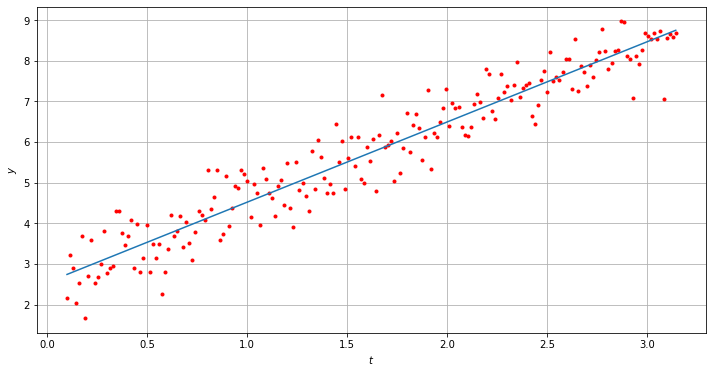

In [9]:
plot(t, y_l, tt, lm(*p_l, tt))

## Cuadrático

In [10]:
y_q = qm(1, 2, 3, t) + np.random.normal(5, 3, n)
A_q = np.ones((n, 3))
A_q[:, 1] = t
A_q[:, 2] = t ** 2
b_q = y_q

In [11]:
p_q = normalEquations(A_q, b_q)

In [12]:
print("Parámetros: c1=%f, c2=%f, c3=%f"%(p_q[0], p_q[1], p_q[2]))

Parámetros: c1=6.018403, c2=1.682171, c3=3.045116


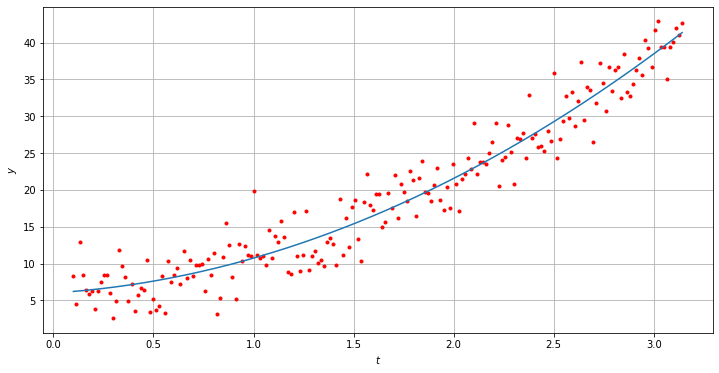

In [13]:
plot(t, y_q, tt, qm(*p_q, tt))

## Periódico

In [14]:
y_s = sm(1, 2, 2, 1, t) + np.random.normal(10, 2, n)
A_s = np.ones((n, 4))
A_s[:, 1] = np.cos(2 * np.pi * t)
A_s[:, 2] = np.sin(2 * np.pi * t)
A_s[:, 3] = np.cos(4 * np.pi * t)
b_s = y_s

In [15]:
p_s = normalEquations(A_s, b_s)

In [16]:
print("Parámetros: c1=%f, c2=%f, c3=%f, c4=%f"%(p_s[0], p_s[1], p_s[2], p_s[3]))

Parámetros: c1=11.137206, c2=2.134255, c3=1.776716, c4=0.983177


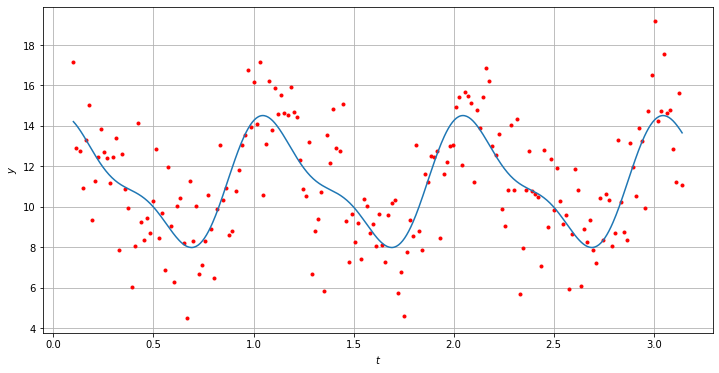

In [17]:
plot(t, y_s, tt, sm(*p_s, tt))

## Exponencial

In [18]:
y_e = 10 + em(1, 1.5, t) + np.random.normal(5, 5, n)
A_e = np.ones((n, 2))
A_e[:, 1] = t
b_e = np.log(y_e)

In [19]:
p_e = normalEquations(A_e, b_e)

In [20]:
print("Parámetros: c1=%f, c2=%f"%(p_e[0], p_e[1]))

Parámetros: c1=2.358559, c2=0.672321


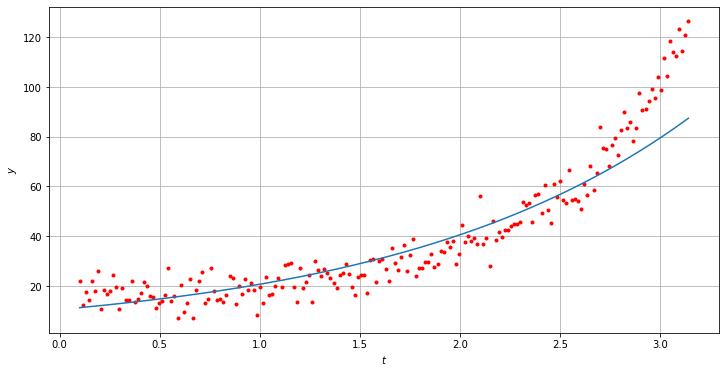

In [21]:
plot(t, y_e, tt,  em(np.exp(p_e[0]), p_e[1], tt))

### En escala logarítmica

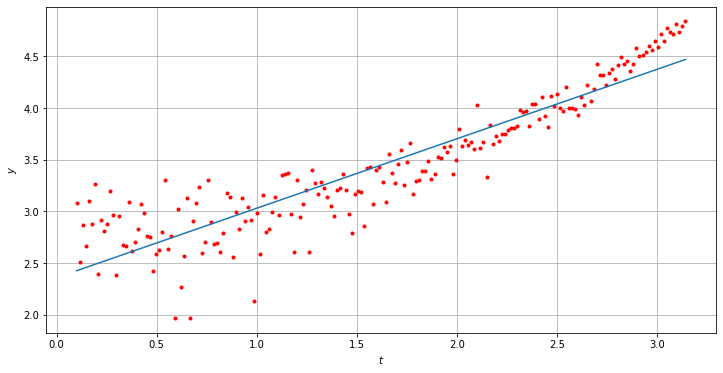

In [22]:
plot(t, b_e, tt, lm(*p_e, tt))

## Ley de potencia

In [23]:
y_p = pm(3, 4, t) * np.random.normal(5, 1, n) 
A_p = np.ones((n, 2))
A_p[:, 1] = np.log(t)
b_p = np.log(y_p)

In [24]:
p_p = normalEquations(A_p, b_p)

In [25]:
print("Parámetros: c1=%f, c2=%f"%(p_p[0], p_p[1]))

Parámetros: c1=2.665977, c2=3.992915


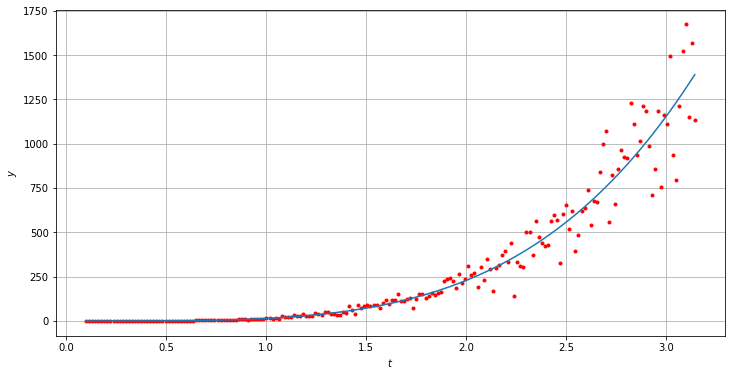

In [26]:
plot(t, y_p, tt, pm(np.exp(p_p[0]), p_p[1], tt))

### En escala logarítmica

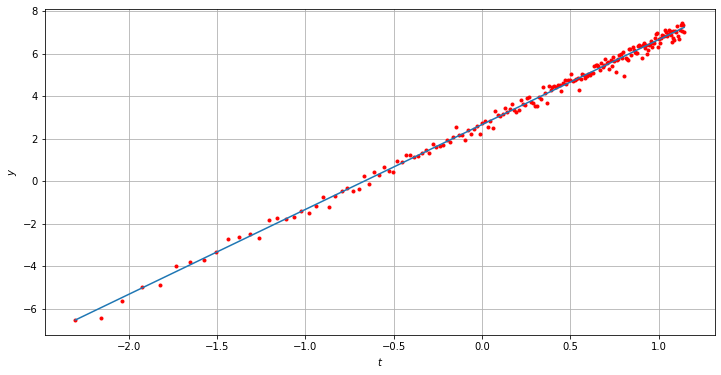

In [27]:
plot(np.log(t), np.log(y_p), np.log(tt), lm(*p_p, np.log(tt)))

# Comentarios

* Basta un método de resolución para las ecuaciones normales, la diferencia aparece en la construcción de $A$, $\mathbf{b}$ y $\mathbf{x}$ con la cantidad de parámetros de los modelos.